<a href="https://colab.research.google.com/github/dudesparsh/Applied-ML/blob/master/Number_Plate_Blurring_using_HaarCascade_(OpenCV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection Project 

## Russian License Plate Blurring

Our goal will be to use Haar Cascades to blur license plates detected in an image!

Russians are famous for having some of the most entertaining DashCam footage on the internet (I encourage you to Google Search "Russian DashCam"). Unfortunately a lot of the footage contains license plates, perhaps we could help out and create a license plat blurring tool?



**Importing the usual libraries you think we'll need.**

In [0]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

**Reading in the car_plate.jpg file from the DATA folder.**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


In [0]:
# Reading the image
img = cv2.imread('DATA/car_plate.jpg')

**Function that displays the image in a larger scale and correct coloring for matplotlib.**

In [0]:
def display(img):
    # Also correcting default OpenCV image coloring to RGB
    fig = plt.figure(figsize=(12,10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(111)
    ax.imshow(img)
    pass

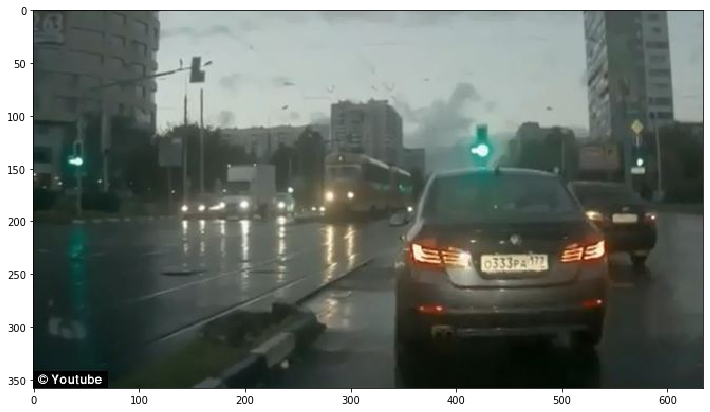

In [10]:
display(img)

**Loading the haarcascade_russian_plate_number.xml file.**

In [0]:
# Loading the file
plate_cascade = cv2.CascadeClassifier('/DATA/haarcascades/haarcascade_russian_plate_number.xml')

**Creating a function that takes in an image and draws a rectangle around what it detects to be a license plate. We're just drawing a rectangle around it for now, later on we'll adjust this function to blur.**

In [0]:
def detect_plate(img):
    # Try tuning scaleFactor and minNeighbors variable to get better results
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)

    for(x,y,w,h) in plate_rects:
      cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255),2)
    return plate_img  
    
    pass

In [0]:
result = detect_plate(img)

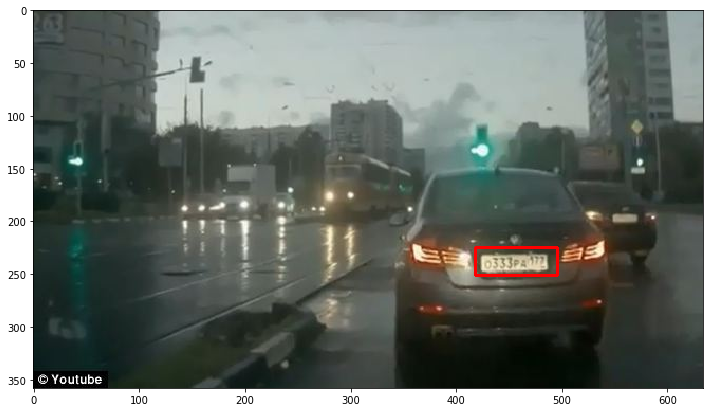

In [32]:
display(result)

**FINAL STEP: Edit Function which effectively blurs the detected plate, instead of just drawing a rectangle around it. Here are the steps you might want to take:**
1. Convert  (x,y,w,h)  to create a rectangle ( Numpy Slicing )
2. After finding  ROI blur the ROI
3. Paster the blurred image on original image, at the right location

In [0]:
def detect_and_blur_plate(img):
    plate_blur = img.copy()
    roi = img.copy()
    # Finding cordinates of numberplate
    plate_blurred = plate_cascade.detectMultiScale(plate_blur, scaleFactor=1.3, minNeighbors=3)
    # Making a blurred image on roi using medianBlur with ksize = 7
    for(x,y,w,h) in plate_blurred:
      roi = roi[y:y+h, x:x+w]
      blurred_roi = cv2.medianBlur(roi,7)
      plate_blur[y:y+h, x:x+w] = blurred_roi
    return plate_blur
    
    pass
    

In [0]:
result = detect_and_blur_plate(img)

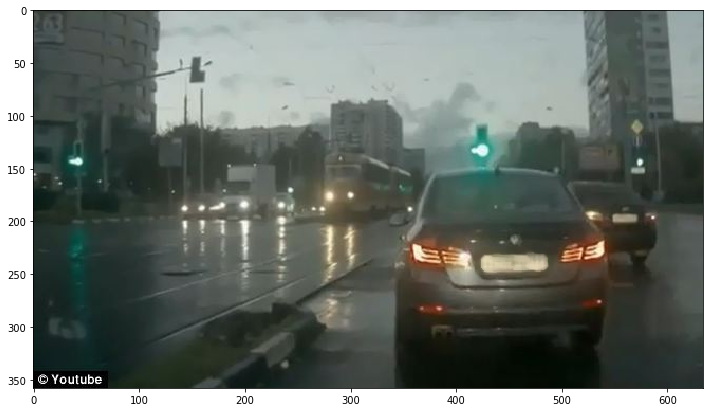

In [37]:
display(result)
# We can see here the number plate of the car is blurred, which was our Goal !!